**About this Dataset**

ANALYTICS IN CREDIT CARD INDUSTRY:
Analytics has penetrated every industry owing to the various technology platforms that collect information and thus, the service providers know what exactly customers want. The Credit Card industry is no exception. Within credit card payment processing, there is a significant amount of data available that can be beneficial in countless ways.

**Understanding the customer behavior**

The data available from a credit card processor identifies the types of consumer and their business spending behaviors. Hence, developing the marketing campaigns to directly address their behaviors indeed grows the revenue and these considerations will result in greater sales.

**Business Problem**

In order to effectively produce quality decisions in the modern credit card industry, knowledge must be gained through effective data analysis and modeling. Through the use of dynamic datadriven decision-making tools and procedures, information can be gathered to successfully evaluate all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and collections, respond to customer requests for help with proactive offers and service.

**About the Data**

This book has the following sheets:

Customer Acquisition: At the time of card issuing, company maintains the details of customers.
Spend (Transaction data): Credit card spend for each customer
Repayment: Credit card Payment done by customer

**What can be done with the data?**

Create a report and display the calculated metrics, reports and inferences.

**Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the csv files**

In [2]:
cusdf=pd.read_csv("C:/Users/HP/OneDrive/Documents/Study Documents/Data Files/Customer Acqusition.csv",usecols=["Customer","Age","City","Product","Limit","Company","Segment"])

In [3]:
cusdf.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
rdf=pd.read_csv("C:/Users/HP/OneDrive/Documents/Study Documents/Data Files/Repayment.csv")

In [5]:
rdf.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [6]:
sdf=pd.read_csv("C:/Users/HP/OneDrive/Documents/Study Documents/Data Files/spend.csv")

In [7]:
sdf.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


**Checking shapes, Dropping insignificant columns,info & null values in the datasets**

In [8]:
cusdf.shape,rdf.shape,sdf.shape

((100, 7), (1523, 5), (1500, 5))

In [9]:
rdf['Unnamed: 4'].unique()

array([nan])

In [10]:
rdf.drop(['SL No:','Unnamed: 4'],axis=1,inplace=True)
sdf.drop('Sl No:',axis=1,inplace=True)

In [11]:
cusdf.shape,rdf.shape,sdf.shape

((100, 7), (1523, 3), (1500, 4))

In [12]:
rdf.rename(columns={'Month':'Repayment Month','Amount':'Repayment Amount'},inplace=True)
sdf.rename(columns={'Month':'Spending Month','Amount':'Spending Amount'},inplace=True)

In [13]:
rdf.head(1)

,Customer,Repayment Month,Repayment Amount
0,A1,12-Jan-04,495414.75


In [14]:
sdf.head(1)

,Customer,Spending Month,Type,Spending Amount
0,A1,12-Jan-04,JEWELLERY,485470.8


In [15]:
cusdf.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [16]:
cusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [17]:
rdf.isnull().sum()

Customer            23
Repayment Month     23
Repayment Amount    23
dtype: int64

In [18]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer          1500 non-null   object 
 1   Repayment Month   1500 non-null   object 
 2   Repayment Amount  1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.8+ KB


In [19]:
rdf.dropna(inplace=True)

In [20]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer          1500 non-null   object 
 1   Repayment Month   1500 non-null   object 
 2   Repayment Amount  1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.9+ KB


In [21]:
sdf.isnull().sum()

Customer           0
Spending Month     0
Type               0
Spending Amount    0
dtype: int64

Customer Accusations has not any null values and datatype mismatch

Repayment dataframe has not any null values and datatype mismatch

Spending dataframe has not any null values and datatype mismatch

In [22]:
cusdf.Age.min(),cusdf.Age.max()

(12, 79)

In [23]:
cusdf[cusdf.Age<18]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
67,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,A70,16,BOMBAY,Platimum,10001.0,C32,Self Employed
89,A90,16,COCHIN,Gold,500000.0,C13,Govt


In [24]:
cusdf[cusdf.Age<18].shape[0]

6

Since Age less than 18 might be the improbable data, we can replace these values with the mean of the age of the customers.

In [25]:
cusdf.Age.mean()

46.49

In [26]:
cusdf.loc[cusdf.Age<18,'Age']=cusdf.Age.mean()

In [27]:
cusdf.iloc[[13,40,62,67,69,89]]

,Customer,Age,City,Product,Limit,Company,Segment
13,A14,46.49,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,A41,46.49,COCHIN,Platimum,500000.0,C23,Govt
62,A63,46.49,BANGALORE,Gold,500000.0,C25,Self Employed
67,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed
89,A90,46.49,COCHIN,Gold,500000.0,C13,Govt


In [28]:
cusdf.Age.mean()

48.399399999999986

In [29]:
cusdf[cusdf.Age>60].shape[0]

25

In [30]:
cusdf.City.unique()

array(['BANGALORE', 'CALCUTTA', 'COCHIN', 'BOMBAY', 'DELHI', 'PATNA',
       'CHENNAI', 'TRIVANDRUM'], dtype=object)

In [31]:
cusdf.Product.unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [32]:
cusdf.Limit.unique()

array([500000., 100000.,  10000.,  10001.,  10002., 100001., 100002.,
       100003.])

In [33]:
cusdf.Company.unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29',
       'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38',
       'C39', 'C40', 'C41'], dtype=object)

In [34]:
cusdf.Segment.unique()

array(['Self Employed', 'Salaried_MNC', 'Salaried_Pvt', 'Govt',
       'Normal Salary'], dtype=object)

In [35]:
sdf.Type.unique()

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'BIKE', 'AUTO', 'SHOPPING', 'AIR TICKET', 'BUS TICKET',
       'TRAIN TICKET', 'RENTAL', 'MOVIE TICKET'], dtype=object)

**Checking for if any customer spent more than his limit i.e. improbable values of Spending Amount**

In [36]:
customer_spend=pd.merge(left=cusdf,right=sdf,on='Customer',how='inner')

In [37]:
customer_spend.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Spending Month,Type,Spending Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8


In [38]:
customer_spend.shape

(1500, 10)

In [39]:
customer_spend[customer_spend['Spending Amount']>customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Spending Month,Type,Spending Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


Since they are improbable values we can simply change this spending amount to 50 percent of the spending limit for approximation.

In [40]:
customer_spend.loc[customer_spend['Spending Amount']>customer_spend['Limit'],
                   'Spending Amount']=customer_spend['Limit']*(0.50)

In [41]:
customer_spend.iloc[[18,19,20,21]]

,Customer,Age,City,Product,Limit,Company,Segment,Spending Month,Type,Spending Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,50000.0
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,50000.0
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,50000.0
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,50000.0


In [42]:
#Spending Amount Updated

In [43]:
customer_spend[customer_spend['Spending Amount']>customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Spending Month,Type,Spending Amount


In case of repayment amount is greater than the limit, we have to replace these improbable values with the repayment amount same as the limit.

In [44]:
customer_repay=pd.merge(left=cusdf,right=rdf,on='Customer',how='inner')

In [45]:
customer_repay.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Repayment Month,Repayment Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75


In [46]:
customer_repay.shape

(1500, 9)

In [47]:
customer_repay[customer_repay['Repayment Amount']>customer_repay['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Repayment Month,Repayment Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,185955.07
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,412783.34
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,148038.67
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,179144.68
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Aug-05,381635.66
...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,462283.02
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57


Since they are improbable values we can simply change this Repayment amount equal to the spending limit for approximation.

In [48]:
customer_repay.loc[customer_repay['Repayment Amount']>customer_repay['Limit'],
                   'Repayment Amount']=customer_repay['Limit']

In [49]:
customer_repay.iloc[[18,19,20,21]]

,Customer,Age,City,Product,Limit,Company,Segment,Repayment Month,Repayment Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,100000.0
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,100000.0
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,100000.0
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,100000.0


In [50]:
customer_repay[customer_repay['Repayment Amount']>customer_repay['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Repayment Month,Repayment Amount


In [51]:
distinct_customer=cusdf['Customer'].nunique()
distinct_customer

100

In [52]:
cusdf['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

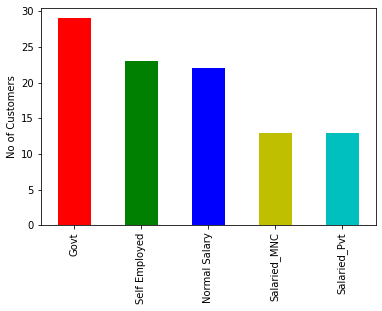

In [53]:
cusdf['Segment'].value_counts().plot(kind='bar', color=['r','g','b','y','c'])
plt.ylabel('No of Customers')
plt.show()

#Inference
1. Maximum customers have Government jobs which are using credit cards.

In [54]:
cusdf.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [55]:
sdf.head(2)

,Customer,Spending Month,Type,Spending Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [56]:
rdf.head(2)

,Customer,Repayment Month,Repayment Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [57]:
cusdf.City.value_counts()

COCHIN        20
BANGALORE     19
CALCUTTA      18
BOMBAY        14
CHENNAI        8
DELHI          7
TRIVANDRUM     7
PATNA          7
Name: City, dtype: int64

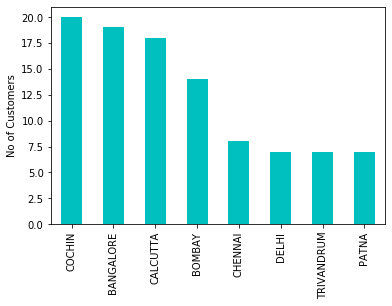

In [58]:
cusdf.City.value_counts().plot(kind='bar',color='c')
plt.ylabel('No of Customers')
plt.show()

Most of the customers are from Cochin followed by Banglore.

In [59]:
cusdf.Product.value_counts()

Gold        38
Platimum    32
Silver      30
Name: Product, dtype: int64

In [60]:
cusdf.groupby('City')['Product'].value_counts()

City        Product 
BANGALORE   Gold        9
            Silver      6
            Platimum    4
BOMBAY      Platimum    6
            Gold        5
            Silver      3
CALCUTTA    Platimum    7
            Gold        6
            Silver      5
CHENNAI     Platimum    3
            Silver      3
            Gold        2
COCHIN      Gold        8
            Platimum    7
            Silver      5
DELHI       Gold        4
            Silver      2
            Platimum    1
PATNA       Gold        3
            Silver      3
            Platimum    1
TRIVANDRUM  Platimum    3
            Silver      3
            Gold        1
Name: Product, dtype: int64

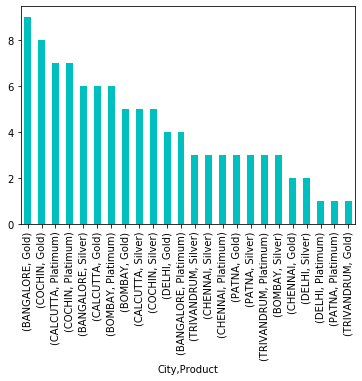

In [61]:
cusdf.groupby('City')['Product'].value_counts().sort_values(
    ascending=False).plot(kind='bar',color='c')
plt.show()

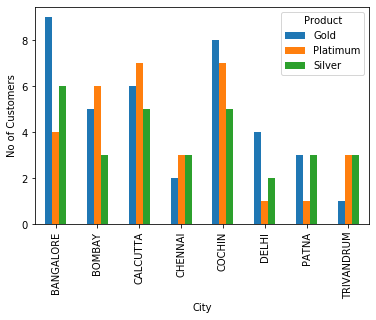

In [62]:
#OR
pd.crosstab(index=cusdf['City'],columns=cusdf['Product']).plot(kind='bar')
plt.ylabel('No of Customers')
plt.show()

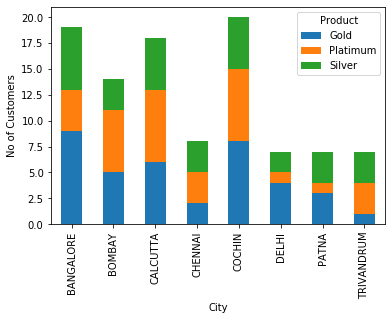

In [63]:
#OR
pd.crosstab(index=cusdf['City'],columns=cusdf['Product']).plot(kind='bar',stacked=True)
plt.ylabel('No of Customers')
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


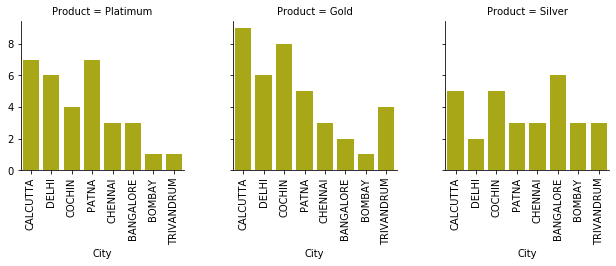

In [64]:
#OR
g=sns.FacetGrid(cusdf,col='Product',col_order=['Platimum','Gold','Silver'])
g.map(sns.countplot,'City', color='y')
g.set_xticklabels(rotation=90)
plt.show()

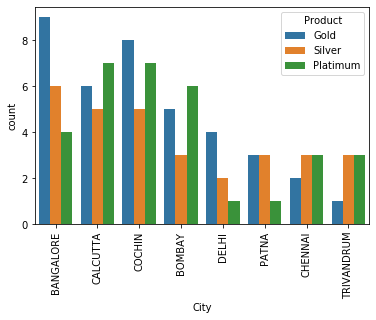

In [65]:
#OR
sns.countplot(x='City',hue='Product',data=cusdf)
plt.xticks(rotation=90)
plt.show()

In [66]:
cusdf.head(1)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


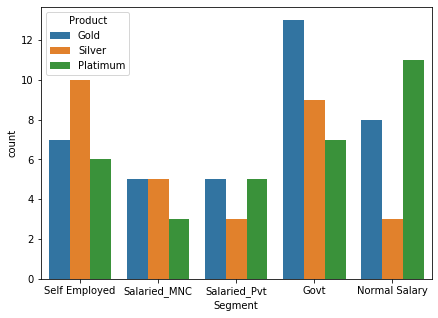

In [67]:
plt.figure(figsize=(7,5))
sns.countplot(x='Segment',hue='Product',data=cusdf)
plt.show()

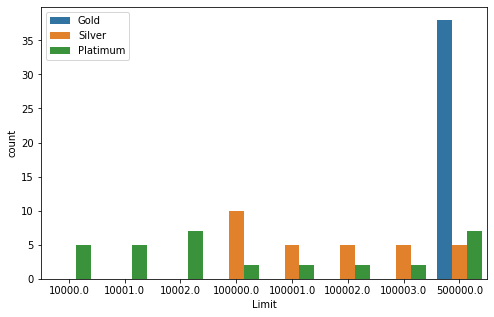

In [68]:
plt.figure(figsize=(8,5))
sns.countplot(x='Limit',hue='Product',data=cusdf)
plt.legend(loc='upper left')
plt.show()

In [69]:
cusdf.head(1)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [70]:
rdf.head(1)

,Customer,Repayment Month,Repayment Amount
0,A1,12-Jan-04,495414.75


In [71]:
sdf.head(1)

,Customer,Spending Month,Type,Spending Amount
0,A1,12-Jan-04,JEWELLERY,485470.8


**Average monthly spent by customers**

In [72]:
sdf['Spending Month']=pd.to_datetime(sdf['Spending Month'])

In [73]:
sdf.head(3)

,Customer,Spending Month,Type,Spending Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46


In [74]:
sdf_avg=pd.DataFrame(round(sdf.groupby([sdf['Spending Month'].dt.year,
                           sdf['Spending Month'].dt.month_name(locale = 'English')
                          ],as_index=True)['Spending Amount'].mean(),2))
sdf_avg.rename_axis(['Spending Year','Spending Months'],inplace=True)
sdf_avg

Spending Amount
Spending Year Spending Months                 
2004          April                  235272.04
              February               221215.27
              January                251712.07
              March                  232146.12
              May                    217539.24
              November               270486.40
              September              310923.38
2005          April                  252181.33
              August                 233734.63
              December               147503.06
              February               229802.28
              January                292741.37
              July                   229116.66
              June                   262688.11
              May                    245696.52
              November               286143.32
              October                194568.64
              September              188666.20
2006          April                  232468.97
              August                 240699.72
              December               270470.98
              February               253858.26
              January                282058.01
              July                   287505.10
              June                   177252.39
              March                  247166.08
              May                    236162.74
              November               182841.29
              October                236136.33
              September              158520.09

**Average monthly repayment of customers**

In [75]:
rdf.head(1)

,Customer,Repayment Month,Repayment Amount
0,A1,12-Jan-04,495414.75


In [76]:
rdf['Repayment Month']=pd.to_datetime(rdf['Repayment Month'])

In [77]:
rdf.head(1)

,Customer,Repayment Month,Repayment Amount
0,A1,2004-01-12,495414.75


In [78]:
repay_avg=pd.DataFrame(round(rdf.groupby([rdf['Repayment Month'].dt.year,
                            rdf['Repayment Month'].dt.month_name(locale='English')
                            ])['Repayment Amount'].mean(),2))
repay_avg.rename_axis(['Repayment Year','Repayment Month'],inplace=True)
repay_avg

Repayment Amount
Repayment Year Repayment Month                  
2004           April                   259141.68
               February                256702.63
               January                 243489.65
               March                   252585.28
               May                     226162.72
               November                209592.24
               September               184487.85
2005           April                   212688.63
               August                  264430.92
               December                320379.34
               February                238829.27
               January                 240548.10
               July                    239871.48
               June                    210199.82
               May                     263207.37
               November                256695.12
               October                 219849.96
               September               247700.17
2006           April                   275472.25
               August                  224143.99
               December                252736.57
               February                284489.57
               January                 293475.39
               July                    257936.38
               June                    251990.45
               March                   240851.27
               May                     256920.88
               November                199399.20
               October                 260765.48
               September               262533.88

**Banking is charging interest rate 2.9% per month on the billing amount**

In [79]:
customer_spend['Spending Month']=pd.to_datetime(customer_spend['Spending Month'])

In [80]:
cus_spe_rep=pd.merge(left=customer_spend,right=rdf,on='Customer',how='inner')

In [81]:
cus_spe_rep.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Spending Month,Type,Spending Amount,Repayment Month,Repayment Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75


In [82]:
cus_spe_rep.shape

(37284, 12)

In [121]:
import warnings
warnings.filterwarnings('ignore')
interest_group=pd.DataFrame(round(cus_spe_rep.groupby([cus_spe_rep['Repayment Month'].dt.year,
                    cus_spe_rep['Repayment Month'].dt.strftime('%B')
                    ])['Spending Amount','Repayment Amount'].apply(sum),1))
interest_group.rename_axis(['Yearly','Monthly'],inplace=True)
interest_group

Spending Amount  Repayment Amount
Yearly Monthly                                     
2004   April         1.194516e+08      2.285403e+08
       February      7.613922e+07      1.602419e+08
       January       1.088357e+09      1.699210e+09
       March         5.594171e+07      8.974470e+07
       May           8.800456e+07      1.411594e+08
       November      5.504612e+07      7.860290e+07
       September     5.144278e+07      8.016122e+07
2005   April         9.366405e+07      1.747894e+08
       August        1.361400e+08      2.477449e+08
       December      4.348638e+07      9.944533e+07
       February      5.890557e+08      9.416163e+08
       January       1.324129e+08      1.810333e+08
       July          3.995653e+07      7.997268e+07
       June          1.174019e+08      2.213774e+08
       May           7.149030e+08      1.099197e+09
       November      1.532278e+08      2.763119e+08
       October       3.140993e+07      6.027830e+07
       September     3.195551e+07      7.530449e+07
2006   April         3.229722e+08      6.093666e+08
       August        5.849630e+07      7.167032e+07
       December      4.585222e+07      7.087702e+07
       February      1.654843e+08      2.903280e+08
       January       5.127574e+07      8.974491e+07
       July          1.444093e+08      2.245720e+08
       June          5.302118e+07      6.914431e+07
       March         7.393854e+08      1.115725e+09
       May           3.297954e+08      5.434823e+08
       November      1.124836e+08      1.355832e+08
       October       5.285823e+07      7.890924e+07
       September     5.395681e+07      8.083199e+07

In [84]:
interest_group['Monthly Billing Amount']=abs(interest_group['Spending Amount'
                                                   ]-interest_group['Repayment Amount'])

In [85]:
interest_group.head()

Spending Amount  Repayment Amount  Monthly Billing Amount
Yearly Monthly                                                            
2004   April        1.194516e+08      2.285403e+08             109088678.8
       February     7.613922e+07      1.602419e+08              84102676.4
       January      1.088357e+09      1.699210e+09             610852459.8
       March        5.594171e+07      8.974470e+07              33802981.4
       May          8.800456e+07      1.411594e+08              53154851.4

In [86]:
interest_group['Interest Earned']=interest_group['Monthly Billing Amount']*(0.029)

In [87]:
interest_group

Spending Amount  Repayment Amount  Monthly Billing Amount  \
Yearly Monthly                                                                
2004   April         1.194516e+08      2.285403e+08             109088678.8   
       February      7.613922e+07      1.602419e+08              84102676.4   
       January       1.088357e+09      1.699210e+09             610852459.8   
       March         5.594171e+07      8.974470e+07              33802981.4   
       May           8.800456e+07      1.411594e+08              53154851.4   
       November      5.504612e+07      7.860290e+07              23556780.1   
       September     5.144278e+07      8.016122e+07              28718444.0   
2005   April         9.366405e+07      1.747894e+08              81125388.6   
       August        1.361400e+08      2.477449e+08             111604891.2   
       December      4.348638e+07      9.944533e+07              55958949.1   
       February      5.890557e+08      9.416163e+08             352560617.8   
       January       1.324129e+08      1.810333e+08              48620420.0   
       July          3.995653e+07      7.997268e+07              40016149.2   
       June          1.174019e+08      2.213774e+08             103975517.2   
       May           7.149030e+08      1.099197e+09             384294443.6   
       November      1.532278e+08      2.763119e+08             123084057.9   
       October       3.140993e+07      6.027830e+07              28868369.7   
       September     3.195551e+07      7.530449e+07              43348983.9   
2006   April         3.229722e+08      6.093666e+08             286394374.2   
       August        5.849630e+07      7.167032e+07              13174018.0   
       December      4.585222e+07      7.087702e+07              25024803.9   
       February      1.654843e+08      2.903280e+08             124843635.3   
       January       5.127574e+07      8.974491e+07              38469168.1   
       July          1.444093e+08      2.245720e+08              80162709.0   
       June          5.302118e+07      6.914431e+07              16123126.1   
       March         7.393854e+08      1.115725e+09             376340025.0   
       May           3.297954e+08      5.434823e+08             213686912.2   
       November      1.124836e+08      1.355832e+08              23099549.0   
       October       5.285823e+07      7.890924e+07              26051015.8   
       September     5.395681e+07      8.083199e+07              26875182.5   

                  Interest Earned  
Yearly Monthly                     
2004   April         3.163572e+06  
       February      2.438978e+06  
       January       1.771472e+07  
       March         9.802865e+05  
       May           1.541491e+06  
       November      6.831466e+05  
       September     8.328349e+05  
2005   April         2.352636e+06  
       August        3.236542e+06  
       December      1.622810e+06  
       February      1.022426e+07  
       January       1.409992e+06  
       July          1.160468e+06  
       June          3.015290e+06  
       May           1.114454e+07  
       November      3.569438e+06  
       October       8.371827e+05  
       September     1.257121e+06  
2006   April         8.305437e+06  
       August        3.820465e+05  
       December      7.257193e+05  
       February      3.620465e+06  
       January       1.115606e+06  
       July          2.324719e+06  
       June          4.675707e+05  
       March         1.091386e+07  
       May           6.196920e+06  
       November      6.698869e+05  
       October       7.554795e+05  
       September     7.793803e+05

**Top 5 Products**

In [88]:
sdf.head()

,Customer,Spending Month,Type,Spending Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [89]:
sdf['Type'].value_counts().head(5)

PETRO           200
CAMERA          160
FOOD            160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

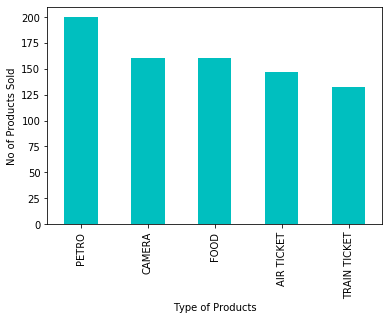

In [90]:
sdf['Type'].value_counts().head(5).plot(kind='bar',color='c')
plt.ylabel('No of Products Sold')
plt.xlabel('Type of Products')
plt.show()

**City with maximum spent**

In [91]:
customer_spend.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Spending Month,Type,Spending Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8


In [92]:
city_spend=customer_spend.groupby('City')['Spending Amount'].sum().sort_values(ascending=False)
city_spend

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Spending Amount, dtype: float64

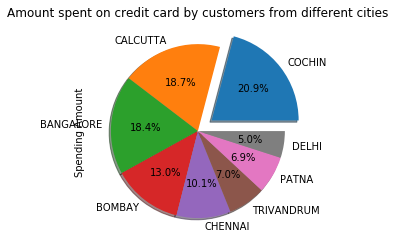

In [93]:
city_spend.plot(kind='pie',autopct='%1.01f%%',shadow=True,labeldistance=1.1,explode=[0.2,
                                                                                    0.0,0.0,0.0,
                                                                                    0.0,0.0,0.0,0.0])
plt.title('Amount spent on credit card by customers from different cities')
plt.show()

**Age group spending more money**

In [94]:
cusdf.Age.min(),cusdf.Age.max()

(19.0, 79.0)

In [95]:
customer_spend['Age Group']=pd.cut(customer_spend['Age'],bins=np.arange(18,88,8)
                                  ,labels=["18-26","26-34","34-42","42-50","50-58","58-66"
                                          ,"66-74","74-82"], include_lowest=True)

In [96]:
customer_spend.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Spending Month,Type,Spending Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,74-82


In [97]:
agegroup_spend=customer_spend.groupby('Age Group')['Spending Amount'].sum().sort_values(ascending=False)
agegroup_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Spending Amount, dtype: float64

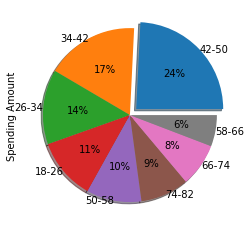

In [98]:
agegroup_spend.plot(kind='pie',autopct='%1.0f%%',explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
                    ,labeldistance=1,shadow=True)
plt.show()

**Top ten customers in terms of repayments**

In [99]:
customer_repay.head(1)

,Customer,Age,City,Product,Limit,Company,Segment,Repayment Month,Repayment Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75


In [100]:
maxrep_cust=customer_repay.groupby('Customer')['Repayment Amount'].sum().sort_values(ascending=False).head(10)
maxrep_cust

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Repayment Amount, dtype: float64

**City wise spend on each product on yearly basis. Also include a graphical representation for the same.**

In [101]:
citywise_yearwise_prod_spent=pd.DataFrame(customer_spend.groupby(
    ['City',customer_spend['Spending Month'].dt.year,'Product'])['Spending Amount'].sum())
citywise_yearwise_prod_spent

Spending Amount
City       Spending Month Product                  
BANGALORE  2004           Gold           9289878.54
                          Platimum       1112732.30
                          Silver         1291852.58
           2005           Gold          12892362.99
                          Platimum        912284.97
...                                             ...
TRIVANDRUM 2005           Platimum       3601443.30
                          Silver          269912.99
           2006           Gold           2735710.87
                          Platimum       2147403.75
                          Silver          555862.12

[72 rows x 1 columns]

### OR

In [102]:
customer_spend_pivot = pd.pivot_table(data = customer_spend,
                                      index=["City",customer_spend['Spending Month'].dt.year],
                                      columns='Product',aggfunc="sum",values="Spending Amount")
customer_spend_pivot

Product                           Gold    Platimum      Silver
City       Spending Month                                     
BANGALORE  2004             9289878.54  1112732.30  1291852.58
           2005            12892362.99   912284.97   830612.34
           2006            12030611.09   685831.27  1415480.94
BOMBAY     2004             6987853.53   897264.94   532089.03
           2005             8983018.28   711804.94   508988.54
           2006             7917144.31   972130.01  1092833.80
CALCUTTA   2004             7477140.98  2037690.30   500006.00
           2005            10303355.80  4434696.31   440147.06
           2006            11167532.77  3589606.66  1157956.42
CHENNAI    2004             1059618.50  3535652.38   282056.86
           2005             3740945.58  5053956.32   377184.49
           2006             2704288.62  5024923.40   350009.50
COCHIN     2004             7315850.15  3419904.07   814229.62
           2005            12110613.03  4960921.71   652269.38
           2006            10499142.38  4920592.29  1269990.87
DELHI      2004             2806495.00   283512.89   768172.30
           2005             1964845.27   494157.86   612311.21
           2006             2957103.32   176788.72   854899.97
PATNA      2004             2072567.90  1113069.60   756684.10
           2005             3252615.77  2883231.07   950094.19
           2006             2276181.69  1256137.65   700005.00
TRIVANDRUM 2004             2415102.84  2161676.67   209667.48
           2005             1240375.85  3601443.30   269912.99
           2006             2735710.87  2147403.75   555862.12

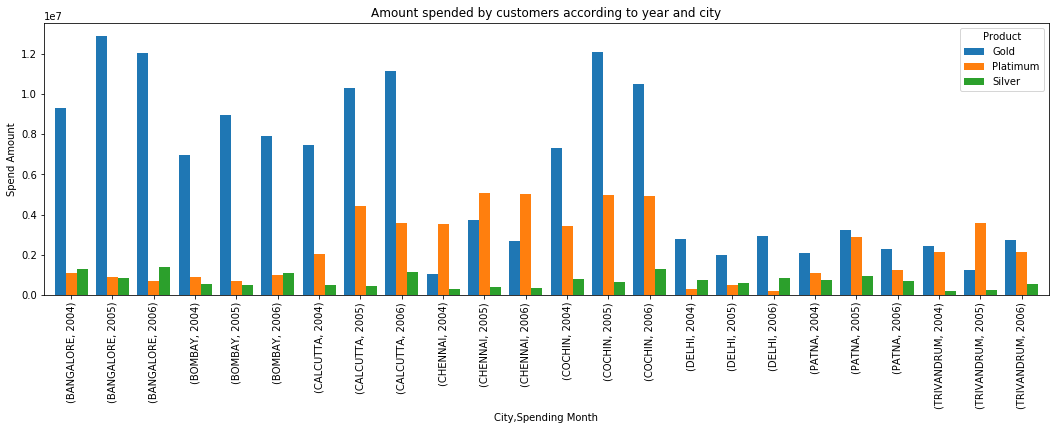

In [103]:
customer_spend_pivot.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

**4. Create graphs for**

(a) Monthly comparison of total spends, city wise

In [104]:
citywise_monthwise_pivot=pd.pivot_table(data=customer_spend,
                                        index="City",
                                       columns=customer_spend['Spending Month'].dt.strftime('%B'),
                                       values='Spending Amount',aggfunc='sum')
citywise_monthwise_pivot

Spending Month,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


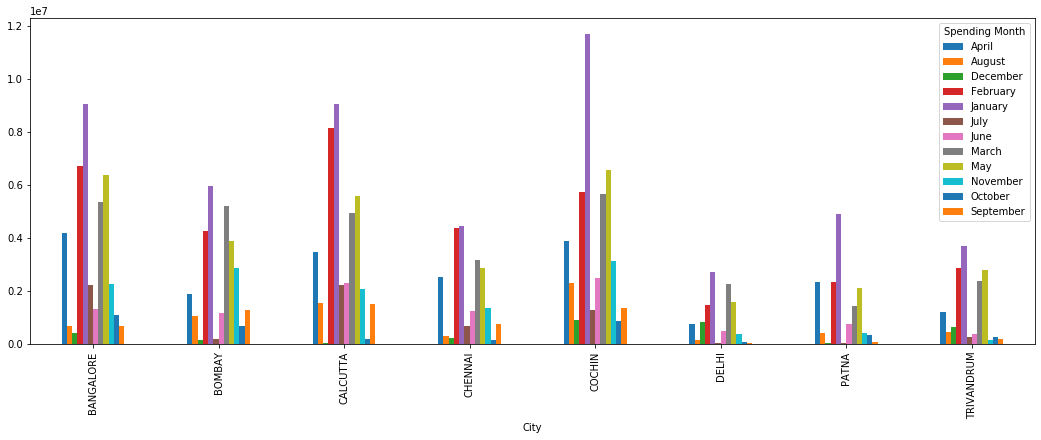

In [105]:
citywise_monthwise_pivot.plot(kind='bar',figsize=(18,6))
plt.show()

(b) Comparison of yearly spend on air tickets

In [106]:
airspent_yearwise=pd.DataFrame(customer_spend[customer_spend['Type']=='AIR TICKET'].groupby(
    customer_spend['Spending Month'].dt.year)[
    'Spending Amount'].sum()).rename_axis('Spending Year').sort_values(
    by='Spending Amount',ascending=False)
airspent_yearwise

,Spending Amount
Spending Year,
2005,10550152.21
2006,5248469.56
2004,4357225.35


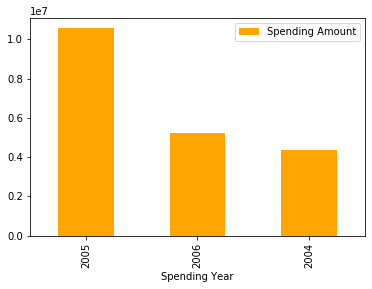

In [107]:
airspent_yearwise.plot(kind='bar',color='orange')
plt.show()

(c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [108]:
monthwise_product_spent=pd.pivot_table(data=customer_spend,index='Product'
    ,columns=customer_spend['Spending Month'
                           ].dt.strftime('%B'),values='Spending Amount',aggfunc='sum')
monthwise_product_spent

Spending Month,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


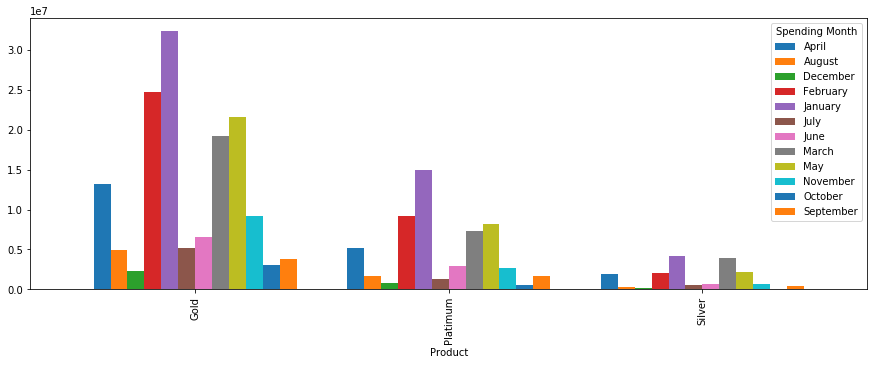

In [109]:
monthwise_product_spent.plot(kind='bar',figsize=(15,5),width=0.8)
plt.show()

(5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [116]:
customer_repay['Repayment Month']=pd.to_datetime(customer_repay['Repayment Month'])

In [117]:
def summary_report(product,timeperiod):
    
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(
            index=['Product','City','Customer'],
            columns=customer_repay['Repayment Month'].dt.strftime('%B'),
            aggfunc='sum',values='Repayment Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI',
                                    'TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(
            index=['Product','City','Customer'],
            columns=customer_repay['Repayment Month'].dt.strftime('%Y'),
            aggfunc='sum',values='Repayment Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI',
                                    'TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(
            index=['Product','City','Customer'],
            columns=customer_repay['Repayment Month'].dt.strftime('%B'),
            aggfunc='sum',values='Repayment Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI',
                                      'TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(
            index=['Product','City','Customer'],
            columns=customer_repay['Repayment Month'].dt.strftime('%Y'),
            aggfunc='sum',values='Repayment Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI',
                                      'TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(
            index=['Product','City','Customer'],
            columns=customer_repay['Repayment Month'].dt.strftime('%B'),
            aggfunc='sum',values='Repayment Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI',
                                        'TRIVANDRUM','PATNA','DELHI']),:]
        
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(
            index=['Product','City','Customer'],
            columns=customer_repay['Repayment Month'].dt.strftime('%Y'),
            aggfunc='sum',values='Repayment Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI',
                                        'TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [118]:
summary_report('gold','monthly')

Repayment Month                   April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   

Repayment Month                 January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        2407806.29   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        BOMBAY     A12       1220387.18  1201928.94  526225.8